In [6]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, BatchNormalization, Dense, Flatten,AveragePooling2D,LayerNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.applications as appl
from sklearn.model_selection import train_test_split
import os
import cv2
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from tqdm import tqdm
from tensorflow.keras.utils import Sequence
from keras import callbacks  
from keras.models import load_model
from keras.utils import np_utils


In [7]:
# parameters

CATEGORIES = ['bull','camel','cat','cow','crocodile','deer','dog','elephant','goat','horse','lion','snake','tiger']
# CATEGORIES = ['camel','cat','cow','crocodile','deer','dog','elephant','goat','horse','lion','snake','tiger']

cat_len=len(CATEGORIES)
IMG_SIZE = 224



In [8]:
X_train = np.load('D:/Agrima/animals_new_MP_hands/X_train.npy', allow_pickle=True)
X_test = np.load('D:/Agrima/animals_new_MP_hands/X_test.npy', allow_pickle=True)
X_new = np.load('D:/Agrima/animals_new_MP_hands/X_new.npy', allow_pickle=True)
y_train = np.load('D:/Agrima/animals_new_MP_hands/y_train.npy', allow_pickle=True)
y_test = np.load('D:/Agrima/animals_new_MP_hands/y_test.npy', allow_pickle=True)
y_new = np.load('D:/Agrima/animals_new_MP_hands/y_new.npy', allow_pickle=True)

In [9]:
# MODEL 1

model_name1 = '15layer_best_3'
# good model consitently improving
# model = Sequential()
model = keras.Sequential(name="my_sequential_1")

model.add(Conv2D(16, (3, 3), input_shape = (IMG_SIZE,IMG_SIZE,3), activation='relu'))         #1
# model.add(MaxPool2D(pool_size = (2, 2)))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.10))
# model.add(BatchNormalization())


model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))                                              #2
# model.add(MaxPool2D(pool_size = (2, 2)))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.10))
# model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))                                              #3
# model.add(MaxPool2D(pool_size = (2, 2)))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.10))
# model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))                                              #4
# model.add(MaxPool2D(pool_size = (2, 2)))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.10))
# model.add(BatchNormalization())


model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))                                              #5
# model.add(MaxPool2D(pool_size = (2, 2)))
model.add(AveragePooling2D(pool_size = (2, 2)))
a1=model.add(Dropout(0.10))
# model.add(BatchNormalization())

model.add(Conv2D(1024, (3, 3), activation='relu')) 
# model.add(Conv2D(1024, (3, 3), activation='relu'))                                              #6
# model.add(MaxPool2D(pool_size = (1, 1)))
# model.add(AveragePooling2D(pool_size = (1, 1)))
model.add(Dropout(0.10))
# model.add(BatchNormalization())

# model.add(Conv2D(128, (3, 3), activation='relu'))                                             #7
# model.add(MaxPool2D(pool_size = (2, 2)))
# model.add(Dropout(0.10))

# model.add(Conv2D(64, (3, 3), activation='relu'))                                             #8
# model.add(MaxPool2D(pool_size = (2, 2)))
# model.add(Dropout(0.10))

# model.add(Conv2D(64, (3, 3), activation='relu'))                                             #9
# model.add(MaxPool2D(pool_size = (2, 2)))
# model.add(Dropout(0.20))

model.add(Flatten())

model.add(Dense(8192, activation = 'relu'))
model.add(Dropout(0.10))
model.add(BatchNormalization())
model.add(LayerNormalization())

model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.10))
model.add(BatchNormalization())
model.add(LayerNormalization())

model.add(Dense(2048, activation = 'relu'))
model.add(Dropout(0.10))
model.add(BatchNormalization())
model.add(LayerNormalization())

model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.10))
model.add(BatchNormalization())
model.add(LayerNormalization())

model.add(Dense(128, activation = 'relu'))                                                    #10
model.add(Dropout(0.10))
# model.add(BatchNormalization())
# model.add(LayerNormalization())

model.add(Dense(cat_len, activation = 'softmax'))                                             #11

model.summary()


Model: "my_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 average_pooling2d_5 (Averag  (None, 111, 111, 16)     0         
 ePooling2D)                                                     
                                                                 
 dropout_11 (Dropout)        (None, 111, 111, 16)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 conv2d_12 (Conv2D)          (None, 107, 107, 32)      9248      
                                                                 
 average_pooling2d_6 (Averag  (None, 53, 53, 32)       0         
 ePooling2D)                                         

In [10]:
# for model 1

print('Training model 1')
earlystopping = callbacks.EarlyStopping(monitor="val_loss", patience = 20, restore_best_weights = True)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# model1.summary()



history_const = model.fit(X_train, y_train,batch_size=50, epochs = 1000, validation_data=(X_test,y_test),
                   callbacks= [earlystopping])

Training model 1
Epoch 1/1000
42/42 [==============================] - 11s 87ms/step - loss: 3.3156 - accuracy: 0.1192 - val_loss: 3.1723 - val_accuracy: 0.0924
Epoch 2/1000
42/42 [==============================] - 2s 50ms/step - loss: 2.7540 - accuracy: 0.1423 - val_loss: 3.2486 - val_accuracy: 0.0664
Epoch 3/1000
42/42 [==============================] - 2s 54ms/step - loss: 2.9518 - accuracy: 0.0966 - val_loss: 2.7091 - val_accuracy: 0.0753
Epoch 4/1000
42/42 [==============================] - 2s 50ms/step - loss: 2.7822 - accuracy: 0.0952 - val_loss: 2.8986 - val_accuracy: 0.0924
Epoch 5/1000
42/42 [==============================] - 2s 55ms/step - loss: 2.6509 - accuracy: 0.1207 - val_loss: 2.6996 - val_accuracy: 0.0493
Epoch 6/1000
42/42 [==============================] - 2s 55ms/step - loss: 2.6116 - accuracy: 0.1226 - val_loss: 2.4703 - val_accuracy: 0.1220
Epoch 7/1000
42/42 [==============================] - 2s 50ms/step - loss: 2.4753 - accuracy: 0.1514 - val_loss: 3.3281 - va

Epoch 58/1000
42/42 [==============================] - 2s 51ms/step - loss: 0.1967 - accuracy: 0.9423 - val_loss: 0.2667 - val_accuracy: 0.9148
Epoch 59/1000
42/42 [==============================] - 2s 51ms/step - loss: 0.1652 - accuracy: 0.9447 - val_loss: 0.1872 - val_accuracy: 0.9453
Epoch 60/1000
42/42 [==============================] - 2s 50ms/step - loss: 0.1667 - accuracy: 0.9457 - val_loss: 0.1475 - val_accuracy: 0.9534
Epoch 61/1000
42/42 [==============================] - 2s 50ms/step - loss: 0.1655 - accuracy: 0.9471 - val_loss: 0.2120 - val_accuracy: 0.9408
Epoch 62/1000
42/42 [==============================] - 2s 50ms/step - loss: 0.1591 - accuracy: 0.9476 - val_loss: 0.1710 - val_accuracy: 0.9471
Epoch 63/1000
42/42 [==============================] - 2s 51ms/step - loss: 0.2792 - accuracy: 0.9135 - val_loss: 0.2345 - val_accuracy: 0.9130
Epoch 64/1000
42/42 [==============================] - 2s 52ms/step - loss: 0.2082 - accuracy: 0.9284 - val_loss: 0.4133 - val_accuracy:

In [6]:
## for model 1

# print('Saving')
# np.save('D:/Agrima/animals_new_MP_hands/'+model_name1+'_history.npy',history_const.history)
# model1.save('D:/Agrima/animals_new_MP_hands/'+model_name1+'_model.h5')

In [4]:
# #MODEL 2

# model_name1 = '8layer_new'

# # model2 = Sequential1()
# model2 = keras.Sequential(name="my_sequential_2")

# model2.add(Conv2D(16, (5, 5), input_shape = (IMG_SIZE,IMG_SIZE,3), activation='relu'))         #1
# model2.add(MaxPool2D(pool_size = (2, 2)))
# model2.add(Dropout(0.30))

# model2.add(Conv2D(16, (5, 5), activation='relu'))                                              #2
# model2.add(MaxPool2D(pool_size = (2, 2)))
# model2.add(Dropout(0.30))

# model2.add(Conv2D(32, (5, 5), activation='relu'))                                              #3
# model2.add(MaxPool2D(pool_size = (2, 2)))
# model2.add(Dropout(0.30))

# model2.add(Conv2D(32, (3, 3), activation='relu'))                                              #4
# model2.add(MaxPool2D(pool_size = (2, 2)))
# model2.add(Dropout(0.20))

# model2.add(Conv2D(64, (3, 3), activation='relu'))                                              #5
# model2.add(MaxPool2D(pool_size = (2, 2)))
# model2.add(Dropout(0.20))

# model2.add(Conv2D(64, (3, 3), activation='relu'))                                              #6
# model2.add(MaxPool2D(pool_size = (2, 2)))
# model2.add(Dropout(0.10))

# # model.add(Conv2D(128, (3, 3), activation='relu'))                                             #7
# # model.add(MaxPool2D(pool_size = (2, 2)))
# # model.add(Dropout(0.10))

# # model.add(Conv2D(64, (3, 3), activation='relu'))                                             #8
# # model.add(MaxPool2D(pool_size = (2, 2)))
# # model.add(Dropout(0.10))

# # model.add(Conv2D(64, (3, 3), activation='relu'))                                             #9
# # model.add(MaxPool2D(pool_size = (2, 2)))
# # model.add(Dropout(0.20))

# model2.add(Flatten())


# # model.add(Dense(256, activation = 'relu'))
# # model.add(Dropout(0.10))
# model2.add(Dense(128, activation = 'relu'))                                                    #10
# model2.add(Dropout(0.10))
# model2.add(Dense(cat_len, activation = 'softmax'))                                             #11

# model2.summary()

NameError: name 'Sequential1' is not defined

In [8]:
# # for model 2

# print('Training model 1')
# earlystopping = callbacks.EarlyStopping(monitor="val_loss", patience = 20, restore_best_weights = True)
# model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# # model1.summary()



# history_const = model2.fit(X_train, y_train,batch_size=50, epochs = 1000, validation_data=(X_test,y_test),
#                    callbacks= [earlystopping])

Training model 1
Epoch 1/1000
42/42 [==============================] - 5s 52ms/step - loss: 2.5569 - accuracy: 0.0913 - val_loss: 2.5550 - val_accuracy: 0.1220
Epoch 2/1000
42/42 [==============================] - 1s 31ms/step - loss: 2.5426 - accuracy: 0.1106 - val_loss: 2.5502 - val_accuracy: 0.1220
Epoch 3/1000
42/42 [==============================] - 1s 31ms/step - loss: 2.5229 - accuracy: 0.1072 - val_loss: 2.3599 - val_accuracy: 0.2395
Epoch 4/1000
42/42 [==============================] - 1s 32ms/step - loss: 1.7534 - accuracy: 0.3808 - val_loss: 1.2710 - val_accuracy: 0.6233
Epoch 5/1000
42/42 [==============================] - 1s 31ms/step - loss: 1.1709 - accuracy: 0.5837 - val_loss: 0.8694 - val_accuracy: 0.6969
Epoch 6/1000
42/42 [==============================] - 1s 31ms/step - loss: 0.9126 - accuracy: 0.6731 - val_loss: 0.8087 - val_accuracy: 0.7587
Epoch 7/1000
42/42 [==============================] - 1s 31ms/step - loss: 0.7991 - accuracy: 0.7067 - val_loss: 0.5486 - val

Epoch 58/1000
42/42 [==============================] - 1s 31ms/step - loss: 0.0580 - accuracy: 0.9784 - val_loss: 0.0846 - val_accuracy: 0.9785
Epoch 59/1000
42/42 [==============================] - 1s 31ms/step - loss: 0.0670 - accuracy: 0.9779 - val_loss: 0.0779 - val_accuracy: 0.9767
Epoch 60/1000
42/42 [==============================] - 1s 31ms/step - loss: 0.0465 - accuracy: 0.9808 - val_loss: 0.0761 - val_accuracy: 0.9812
Epoch 61/1000
42/42 [==============================] - 1s 32ms/step - loss: 0.0691 - accuracy: 0.9803 - val_loss: 0.0830 - val_accuracy: 0.9749
Epoch 62/1000
42/42 [==============================] - 1s 31ms/step - loss: 0.0661 - accuracy: 0.9750 - val_loss: 0.0604 - val_accuracy: 0.9794
Epoch 63/1000
42/42 [==============================] - 1s 32ms/step - loss: 0.0521 - accuracy: 0.9851 - val_loss: 0.0574 - val_accuracy: 0.9821
Epoch 64/1000
42/42 [==============================] - 1s 32ms/step - loss: 0.0404 - accuracy: 0.9856 - val_loss: 0.0879 - val_accuracy:

Epoch 115/1000
42/42 [==============================] - 1s 31ms/step - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.0921 - val_accuracy: 0.9794
Epoch 116/1000
42/42 [==============================] - 1s 31ms/step - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0525 - val_accuracy: 0.9857
Epoch 117/1000
42/42 [==============================] - 1s 31ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0619 - val_accuracy: 0.9848
Epoch 118/1000
42/42 [==============================] - 1s 32ms/step - loss: 0.0302 - accuracy: 0.9899 - val_loss: 0.0584 - val_accuracy: 0.9830
Epoch 119/1000
42/42 [==============================] - 1s 32ms/step - loss: 0.0403 - accuracy: 0.9889 - val_loss: 0.0427 - val_accuracy: 0.9883
Epoch 120/1000
42/42 [==============================] - 1s 32ms/step - loss: 0.0258 - accuracy: 0.9899 - val_loss: 0.0555 - val_accuracy: 0.9830
Epoch 121/1000
42/42 [==============================] - 1s 31ms/step - loss: 0.0237 - accuracy: 0.9918 - val_loss: 0.0443 - val_ac

In [9]:
# for model 2

# print('Saving')
# np.save('D:/Agrima/animals_new_MP_hands/'+model_name1+'_history.npy',history_const.history)
# model2.save('D:/Agrima/animals_new_MP_hands/'+model_name1+'_model.h5')

Saving


In [ ]:
# # #load saved history
# history_const=np.load('D:/Agrima/animals_new_MP_hands/'+model_name1+'_history.npy',allow_pickle='TRUE').item()

# # #load saved model
# model1=load_model('D:/Agrima/animals_new_MP_hands/'+model_name1+'_model.h5')

In [6]:
# # model 3

# # Merged models

# # model_name1 = '16layer_8layer_concat'


# model1 = tf.keras.models.load_model('D:/Agrima/animals_new_MP_hands/8layer_new_model.h5')
# model2 = tf.keras.models.load_model('D:/Agrima/animals_new_MP_hands/15layer_best_3_model.h5')

# # model1 = model1
# # model2 = model2

# input_shape=(IMG_SIZE,IMG_SIZE,3)
# n_outputs=13

# inputs = tf.keras.layers.Input(shape=input_shape)
# combined = tf.keras.layers.Concatenate()([model1(inputs), model2(inputs)])
# outputs = tf.keras.layers.Dense(n_outputs)(combined)

# model3 = tf.keras.models.Model(inputs, outputs)
# model3.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 13)           60630157    ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 13)           95133       ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 26)           0           ['sequential[0][0]',         

In [7]:
# for model 3

print('Training model 1')
earlystopping = callbacks.EarlyStopping(monitor="val_loss", patience = 20, restore_best_weights = True)
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# model1.summary()



history_const = model3.fit(X_train, y_train,batch_size=50, epochs = 1000, validation_data=(X_test,y_test),
                   callbacks= [earlystopping])

Training model 1
Epoch 1/1000
42/42 [==============================] - 9s 108ms/step - loss: 7.2653 - accuracy: 0.0841 - val_loss: 10.0046 - val_accuracy: 0.0753
Epoch 2/1000
42/42 [==============================] - 3s 73ms/step - loss: 7.8514 - accuracy: 0.0822 - val_loss: 7.6971 - val_accuracy: 0.0771
Epoch 3/1000
42/42 [==============================] - 3s 68ms/step - loss: 7.9607 - accuracy: 0.0865 - val_loss: 7.5636 - val_accuracy: 0.0771
Epoch 4/1000
42/42 [==============================] - 3s 62ms/step - loss: 7.5949 - accuracy: 0.0659 - val_loss: 7.6427 - val_accuracy: 0.0771
Epoch 5/1000
42/42 [==============================] - 3s 62ms/step - loss: 8.5240 - accuracy: 0.0817 - val_loss: 7.5860 - val_accuracy: 0.0771
Epoch 6/1000
42/42 [==============================] - 3s 72ms/step - loss: 9.0802 - accuracy: 0.0615 - val_loss: 7.5185 - val_accuracy: 0.0870
Epoch 7/1000
42/42 [==============================] - 3s 62ms/step - loss: 8.3305 - accuracy: 0.0716 - val_loss: 7.5993 - v

In [1]:
# from tensorflow import keras
# from keras import layers
# from tensorflow.keras.layers import Input, Dense, concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras.utils import plot_model

# a_ip_img = Input(shape=(32,32,1), name="Input_a")
# b_ip_img = Input(shape=(32,32,1), name="Input_b")
# # concate both models

# #Merging model A and B
# a1_a2 = concatenate([a1,a2],name="concatenated_layer")

# #Final Layer
# output_layer = Dense(13, activation = "softmax", name = "output_layer")(a1_a2)

# #Model Definition 
# merged = Model(inputs=[(a_ip_img,b_ip_img)],outputs=[output_layer], name = "merged model")

# #Model Details
# merged.summary()

In [13]:


# # #load saved history
# history_const=np.load('D:/Agrima/animals_new_MP_hands/'+model_name1+'_history.npy',allow_pickle='TRUE').item()

# # #load saved model
# model1=load_model('D:/Agrima/animals_new_MP_hands/'+model_name1+'_model.h5')

Confusion matrix


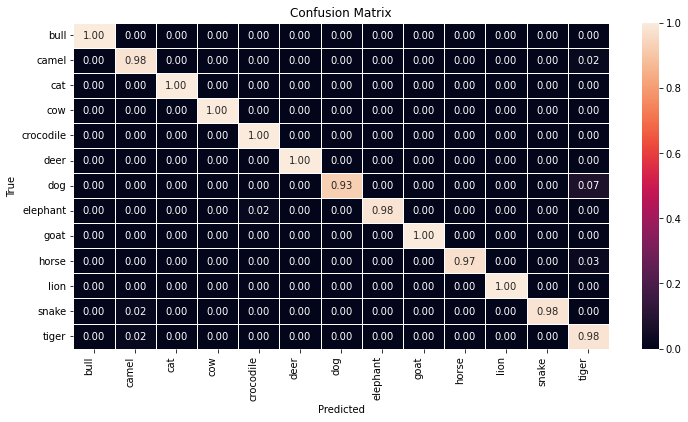

In [10]:
print('Confusion matrix')
Y_pred = model2.predict(X_new)
y_pred = np.argmax(Y_pred, axis=1)
y_test1 = np.argmax(y_new, axis=1)

cm=metrics.confusion_matrix(y_test1, y_pred)


cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
a4_dims = (12, 6)
fig,ax= plt.subplots(figsize=a4_dims)
sns.heatmap(cm, annot=True, fmt=".2f", ax=ax,  linewidth=.5);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(CATEGORIES)
ax.set_yticklabels(CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.setp(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
# plt.savefig('D:/Agrima/animals_new_MP_hands/'+model_name1+'_cm.png',bbox_inches='tight')
plt.show()


Predicted Label:  cat
True Label:  cat


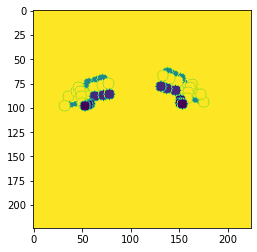

In [11]:
#CHECK RANDOM IMAGES FROM TESTED DATA WHETHER RIGHT OR WRONG

i = random.randint(1,cat_len)
plt.imshow(X_new[i,:,:,2]) 
print("Predicted Label: ", CATEGORIES[int(y_pred[i])])
print("True Label: ", CATEGORIES[int(y_test1[i])])

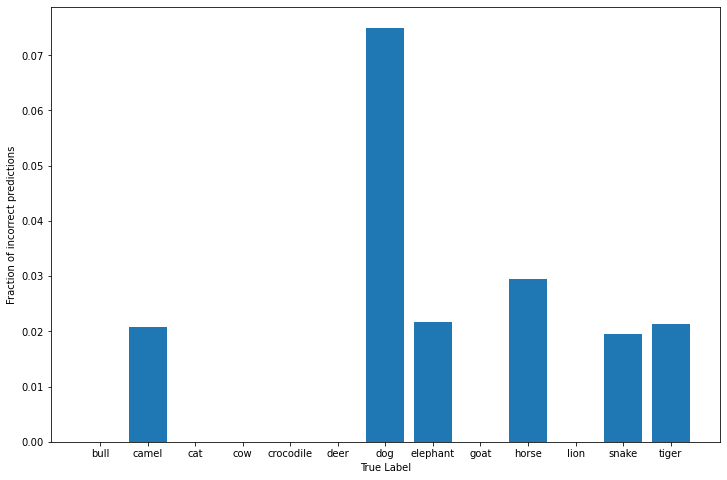

In [12]:
#PLot fractional incorrect misclassifications

incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

fig, ax = plt.subplots(figsize=(12,8))
plt.bar(np.arange(cat_len), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(cat_len), CATEGORIES)
plt.savefig('D:/Agrima/animals_new_MP_hands/'+model_name1+'_incorrect_percentage.png',bbox_inches='tight')
plt.show()

Plots


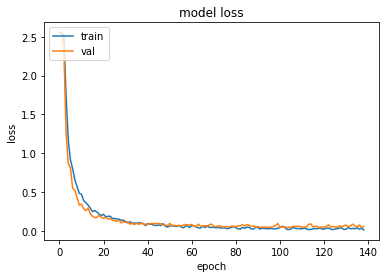

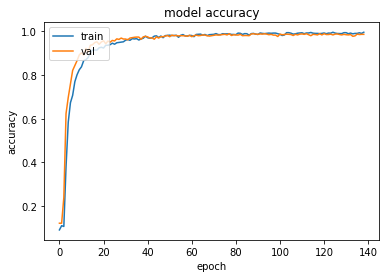

In [13]:
print('Plots')
plt.plot(history_const.history['loss'])
plt.plot(history_const.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('D:/Agrima/animals_new_MP_hands/'+model_name1+'_loss.png')
plt.show()
plt.plot(history_const.history['accuracy'])
plt.plot(history_const.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('D:/Agrima/animals_new_MP_hands/'+model_name1+'_accuracy.png')
plt.show()

In [ ]:
import mediapipe as mp

cap = cv2.VideoCapture(0)
org = (50, 20)  
# fontScale
fontScale = 0.7   
font = cv2.FONT_HERSHEY_SIMPLEX
# Blue color in BGR
color = (0, 255, 0)  
# Line thickness of 2 px
thickness = 2   
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
with mp_hands.Hands(model_complexity=0, min_detection_confidence=0.5,min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        r,img_array = cap.read()
        img_array = cv2.flip(img_array, 1)
        #img_array = img_array[:, 80:560, :]
        results = hands.process(img_array)
        if not results.multi_hand_landmarks:
            continue
        annotated_image = img_array.copy()
        img = np.zeros([IMG_SIZE,IMG_SIZE,3],dtype=np.uint8)
        img.fill(255)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(img,hand_landmarks,mp_hands.HAND_CONNECTIONS,
                                          mp_drawing_styles.get_default_hand_landmarks_style(),
                                          mp_drawing_styles.get_default_hand_connections_style())
                mp_drawing.draw_landmarks(annotated_image,hand_landmarks,mp_hands.HAND_CONNECTIONS,
                                          mp_drawing_styles.get_default_hand_landmarks_style(),
                                          mp_drawing_styles.get_default_hand_connections_style())
       

        
        #img_arrayr = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        #cv2.imshow('v',img)
        X = np.array(img).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
        X = X.astype('float32')
        X /= 255
        X = np.array(X)
        Y = model2.predict(X)
        
        # Using cv2.putText() method
        annotated_image = cv2.putText(annotated_image, CATEGORIES[np.argmax(Y)] + " Prob: "+ str(np.max(Y)), org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
        cv2.imshow('Realtime test',annotated_image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
# close the camera
cap.release()

# close all the opened windows
cv2.destroyAllWindows()
